In [44]:
import numpy as np
from tight_binding.bandstructure import plot_bandstructure2D
import scipy.linalg as la

In [30]:
def R(phi,n):
        if n[0]**2 + n[1]**2 <= 1e-5:
                e0 = np.array([1,0,0])
                e1 = np.array([0,n[2],0])
                e2 = n
        else:
            e0 = np.array([-n[1],n[0],0]) / (n[0]**2+n[1]**2)**0.5
            e1 = (np.array([-n[0]*n[2],-n[1]*n[2],n[0]**2 + n[1]**2]) 
                  / (n[0]**2 + n[1]**2)**0.5)
            e2 = n
        S = np.zeros((3,3)).astype('float')
        S[:,0] = e0
        S[:,1] = e1
        S[:,2] = e2
        rot_z = np.array([
            [np.cos(phi),-np.sin(phi),0],
            [np.sin(phi),np.cos(phi),0],
            [0,0,1]
        ])
        rot = S @ rot_z @ np.transpose(S)
        return rot

In [31]:
t = np.linspace(0,1,7)

In [32]:
V_1 = np.zeros((100,100,3,3), dtype='float')
V_2 = np.zeros((100,100,3,3), dtype='float')
V_3 = np.zeros((100,100,3,3), dtype='float')
V_4 = np.zeros((100,100,3,3), dtype='float')
V_5 = np.zeros((100,100,3,3), dtype='float')
V_6 = np.zeros((100,100,3,3), dtype='float')

In [33]:
for i in range(100):
    for j in range(100):
        V_1[i,j] = np.identity(3)
        V_2[i,j] = R(np.pi*i/100,V_1[i,j,:,2])
        V_3[i,j] = R(np.pi*i/100,V_1[i,j,:,2])
        V_4[i,j] = R(np.pi*i/100,V_3[i,j,:,0]) @ V_3[i,j]
        V_5[i,j] = R(np.pi*i/100,V_3[i,j,:,0]) @ V_3[i,j]
        V_6[i,j] = R(np.pi*i/100,V_5[i,j,:,1]) @ V_5[i,j]

In [34]:
E_1 = np.array([-2/3 - 1/3*t[0]/(t[1]-t[0]), 0 + 1/3*t[0]/(t[1]-t[0]), 2/3])*np.pi
E_1_dot = np.array([1/3/(t[1]-t[0]), -1/3/(t[1]-t[0]), 0])*np.pi

E_2 = np.array([-1/3 + 1/3*t[1]/(t[2]-t[1]), -1/3 - 1/3*t[1]/(t[2]-t[1]), 2/3])*np.pi
E_2_dot = np.array([-1/3/(t[2]-t[1]), 1/3/(t[2]-t[1]), 0])*np.pi

E_3 = np.array([-2/3, 0 - 1/3*t[2]/(t[3]-t[2]), 2/3 + 1/3*t[2]/(t[3]-t[2])])*np.pi
E_3_dot = np.array([0, 1/3/(t[3]-t[2]), -1/3/(t[3]-t[2])])*np.pi

E_4 = np.array([-2/3, 1/3 + 1/3*t[3]/(t[4]-t[3]), 1/3 - 1/3*t[3]/(t[4]-t[3])])*np.pi
E_4_dot = np.array([0, -1/3/(t[4]-t[3]), 1/3/(t[4]-t[3])])*np.pi

E_5 = np.array([-2/3 + 1/3*t[4]/(t[5]-t[4]), 0, 2/3 - 1/3*t[4]/(t[5]-t[4])])*np.pi
E_5_dot = np.array([-1/3/(t[5]-t[4]), 0, 1/3/(t[5]-t[4])])*np.pi

E_6 = np.array([-1 - 1/3*t[5]/(t[6]-t[5]), 0, 1 + 1/3*t[5]/(t[6]-t[5])])*np.pi
E_6_dot = np.array([1/3/(t[6]-t[5]), 0, -1/3/(t[6]-t[5])])*np.pi

In [40]:
def H(time):
    hamiltonian = np.zeros((100,100,3,3), dtype='complex')
    for i in range(100):
        for j in range(100):
            if time <= t[1]:
                hamiltonian[i,j] = V_1[i,j] @ np.diag(E_1 + 2*E_1_dot*time) @ np.transpose(V_1[i,j])
            elif time <= t[2]:
                hamiltonian[i,j] = V_2[i,j] @ np.diag(E_2 + 2*E_2_dot*time) @ np.transpose(V_2[i,j])
            elif time <= t[3]:
                hamiltonian[i,j] = V_3[i,j] @ np.diag(E_3 + 2*E_3_dot*time) @ np.transpose(V_3[i,j])
            elif time <= t[4]:
                hamiltonian[i,j] = V_4[i,j] @ np.diag(E_4 + 2*E_4_dot*time) @ np.transpose(V_4[i,j])
            elif time <= t[5]:
                hamiltonian[i,j] = V_5[i,j] @ np.diag(E_5 + 2*E_5_dot*time) @ np.transpose(V_5[i,j])
            elif time <= t[6]:
                hamiltonian[i,j] = V_6[i,j] @ np.diag(E_6 + 2*E_6_dot*time) @ np.transpose(V_6[i,j])
    return hamiltonian

In [56]:
energy_grid = np.zeros((100,100,3), dtype='float')
blochvector_grid = np.zeros((100,100,3,3), dtype='float')

hamiltonian = H(0.1)
for i in range(100):
    for j in range(100):
        eigenvalues, eigenvectors = np.linalg.eig(hamiltonian[i,j])
        energy_grid[i,j] = eigenvalues
        blochvector_grid[i,j] = eigenvectors

C:\Users\laure\AppData\Local\Temp\ipykernel_6440\529968190.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  energy_grid[i,j] = eigenvalues
C:\Users\laure\AppData\Local\Temp\ipykernel_6440\529968190.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  blochvector_grid[i,j] = eigenvectors


In [51]:
energy_grid = np.zeros((100,100,3), dtype='float')
blochvector_grid = np.zeros((100,100,3,3), dtype='float')


times = np.linspace(0,1,100,endpoint=False)
dt = 1 / 100
U = np.zeros((100,100,3,3), dtype='complex')
for i in range(100):
    for j in range(100):
        U[i,j] = np.identity(3, dtype='complex')
for k in range(len(times)):
    hamiltonian = H(times[k])
    for i in range(100):
        for j in range(100):
            U[i,j] = np.matmul(la.expm(-1j * hamiltonian[i,j] * dt), U[i,j])

for i in range(100):
    for j in range(100):
        eigenvalues, eigenvectors = np.linalg.eig(U[i,j])
        energies = np.real(np.log(eigenvalues) / (-1j))
        errors = np.real(np.log(eigenvalues)) #checking for real eigenenergies
        if np.sum(errors) > 1e-5:
            print('Imaginary quasienergies!')
        #Getting the energies in the right range
        energy_grid[i,j] = (energies + 2*np.pi*np.floor((-np.pi-energies) 
                                                / (2*np.pi) + 1))
        blochvector_grid[i,j] = eigenvectors



KeyboardInterrupt: 

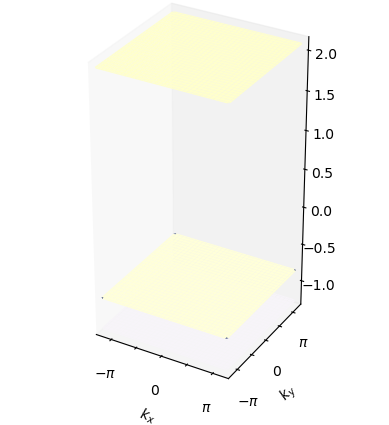

In [57]:
plot_bandstructure2D(energy_grid, np.array([1,0]), np.array([0,1]), 'test.png', regime='static')